<a href="https://colab.research.google.com/github/imran201khan/Data-Analytics-Task/blob/main/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

# **Upload Excel File**

In [ ]:
df=pd.read_excel("/content/Data Visualization Assignmnet.xlsx") 

# **Data Size?**

In [ ]:
df.shape
#rows=111,columns=4

(111, 4)

# **How is Data Looks Like?**

In [ ]:
df.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1.0,Kolenchery
1,2022-04-01,Fish,1.0,Kolenchery
2,2022-04-03,Beef,2.0,Tripunithura
3,2022-04-05,Prawns,1.0,Bangalore
4,2022-04-06,Dates,1.0,Mangalore


# **Having Duplicate Values?**

In [ ]:
df.duplicated().sum()
#9 duplicate values in the dataset

5

In [ ]:
#drop duplicates values
df.drop_duplicates(inplace=True)

# **Having Null Values?**

In [ ]:
df.isnull().sum()
#In PLACE Column have 8 null values

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          7
dtype: int64

In [ ]:
x=df["UNIT"][99:].sum()
#total units where place is not maention
x

12.0

In [ ]:
#7 values are null means approx 0.05% values are null i can drop null values
df.dropna(inplace=True)

# **Describe Data**

In [ ]:
df.describe(include="all")
#its a important to analyze data staticaly like mean,std,min,max,unique,percentile and more 
#such as mean of unit is 1.72,maximum unit is 6,minimum unit is 1 

,DATE,DESCRIPTION,UNIT,PLACE
count,99,99,99.000000,99
unique,33,10,NaN,33
top,2022-05-19 00:00:00,Beef,NaN,Malappuram
freq,9,28,NaN,10
first,2022-04-01 00:00:00,NaN,NaN,NaN
last,2022-06-28 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,1.727273,NaN
std,NaN,NaN,1.114086,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,1.000000,NaN


In [ ]:
#convert date into month and year for better visualisation
df['DATE']=df['DATE'].dt.strftime('%Y-%m')

# **Univariate Analysis**

In [ ]:
# Create subplots: use 'bar' type for Bar subplot
fig = make_subplots(rows=1, cols=4, specs=[[{"type":"bar"}, {"type":"bar"},{"type":"bar"},{"type":"bar"}]])
fig.add_trace(go.Bar(x=list(df["DATE"].value_counts().index), y=list(df["DATE"].value_counts()), name="DATE"),
              1, 1)
fig.add_trace(go.Bar(x=list(df["DESCRIPTION"].value_counts().index), y=list(df["DESCRIPTION"].value_counts()), name="DESCRIPTION"),
              1, 2)
fig.add_trace(go.Bar(x=list(df["PLACE"].value_counts().index), y=list(df["PLACE"].value_counts()), name="PLACE"),
              1, 3)
fig.add_trace(go.Bar(x=list(df["UNIT"].value_counts().index), y=list(df["UNIT"].value_counts()), name="UNIT"),
              1, 4)

fig.show()
# Count Date, Description,Places and Unit  Shoing in Bar chart 

**Above ,In these bar chart represnt count of difrrent data points for every column,its easy to read the all data such as count of  sold products for every months,which description,how much sold ,count of  places, count of products units**



In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=4, specs=[[{"type":"domain"}, {"type":"domain"},{"type":"domain"},{"type":"domain"}]])
fig.add_trace(go.Pie(labels=list(df["DATE"].value_counts().index), values=list(df["DATE"].value_counts()), name="DATE"),
              1, 1)
fig.add_trace(go.Pie(labels=list(df["DESCRIPTION"].value_counts().index), values=list(df["DESCRIPTION"].value_counts()), name="DESCRIPTION"),
              1, 2)
fig.add_trace(go.Pie(labels=list(df["PLACE"].value_counts().index), values=list(df["PLACE"].value_counts()), name="PLACE"),
              1, 3)
fig.add_trace(go.Pie(labels=list(df["UNIT"].value_counts().index), values=list(df["UNIT"].value_counts()), name="UNIT"),
              1, 4)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.show()
#Percentage of Date,Description,Places,Unit  Showing in pie chart 

**Above,its pie chart most useful chart for representaion of categorical data in form of percentag  ,In these Pie chart represnt Percentage of difrrent data points for every column,its easy to read the all data such as Percentage  of sold products category for every months,which description,how much sold ,Percantage of places, Percentage of products units**

# **Bivariate Analysis**

In [ ]:
fig = px.bar(df, x="PLACE", y="UNIT", color="DESCRIPTION")
fig.show()
#number of unit  by place for every description  

**In this graph we can got information easily of multilple variable like Malappuram sold maximum products , discription of those products are (Dry fruits,Lemmon,Mango,Prwans,Fish beef) and Prwans sold more unite compare to all others and in mangalore sold only one product and one unit**

In [ ]:
fig = px.bar(df, x="DESCRIPTION", y="UNIT",color="DATE")
fig.show()
#coun of unit for description  in every month

**reprsentaion of this graph is Count of Unit of Products by every month**

# **Group By**

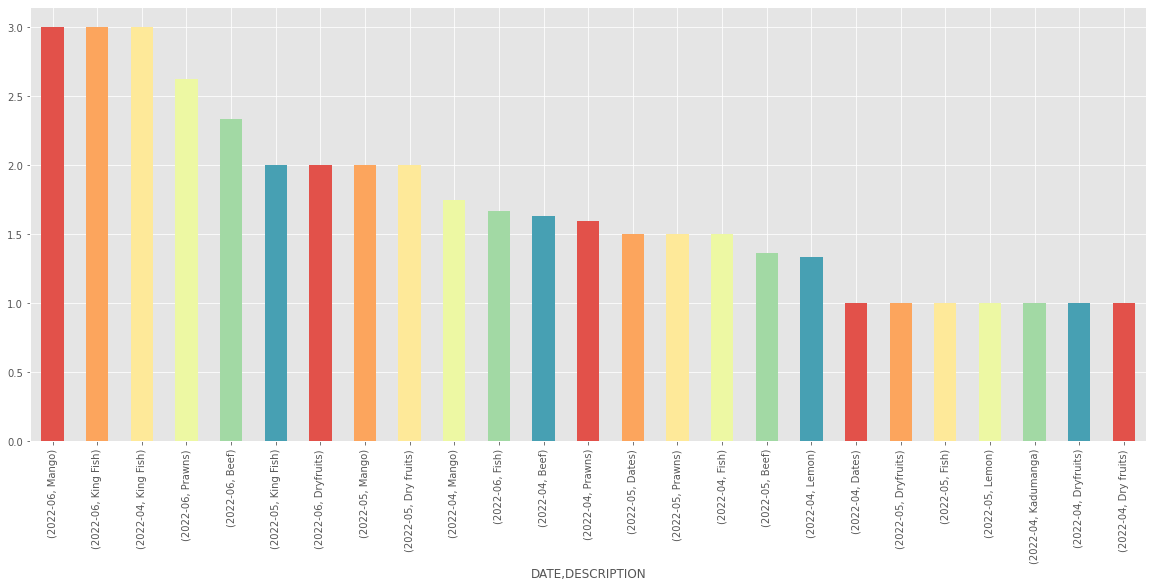

In [ ]:
plt.figure(figsize=(20,8))
df.groupby(['DATE','DESCRIPTION']).mean()['UNIT'].sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("Spectral"))
#Date and Description by avg of unit

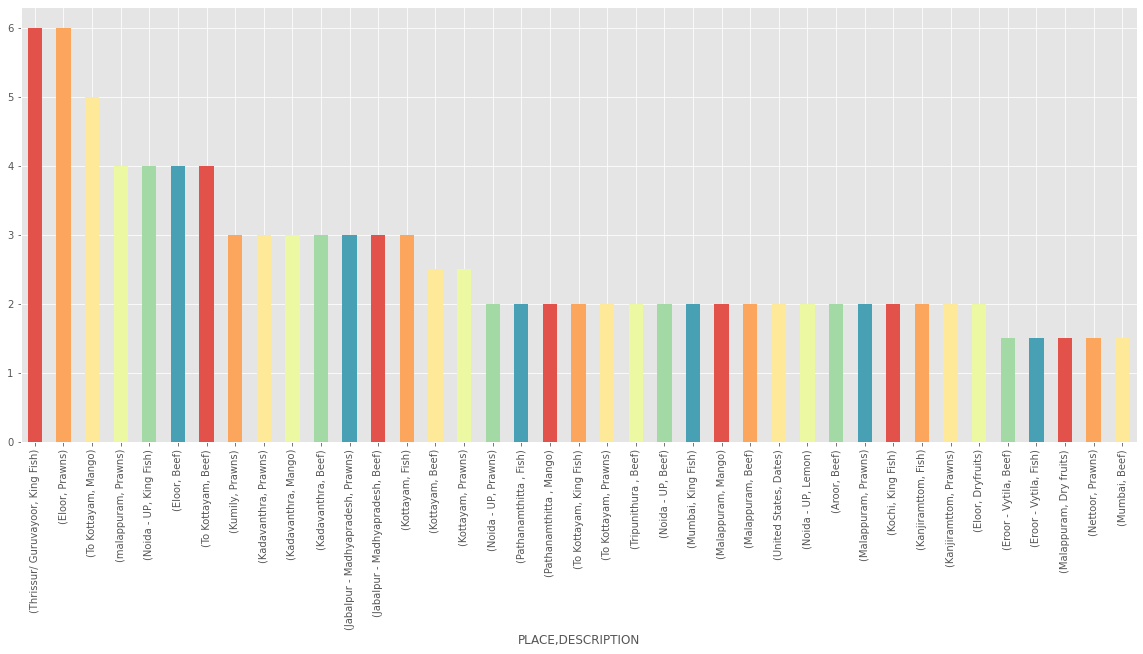

In [ ]:
plt.figure(figsize=(20,8))
df.groupby(['PLACE','DESCRIPTION']).mean()['UNIT'].sort_values(ascending=False)[:39].plot(kind='bar',color=sns.color_palette("Spectral"))
#Place and description by avg of unit>1

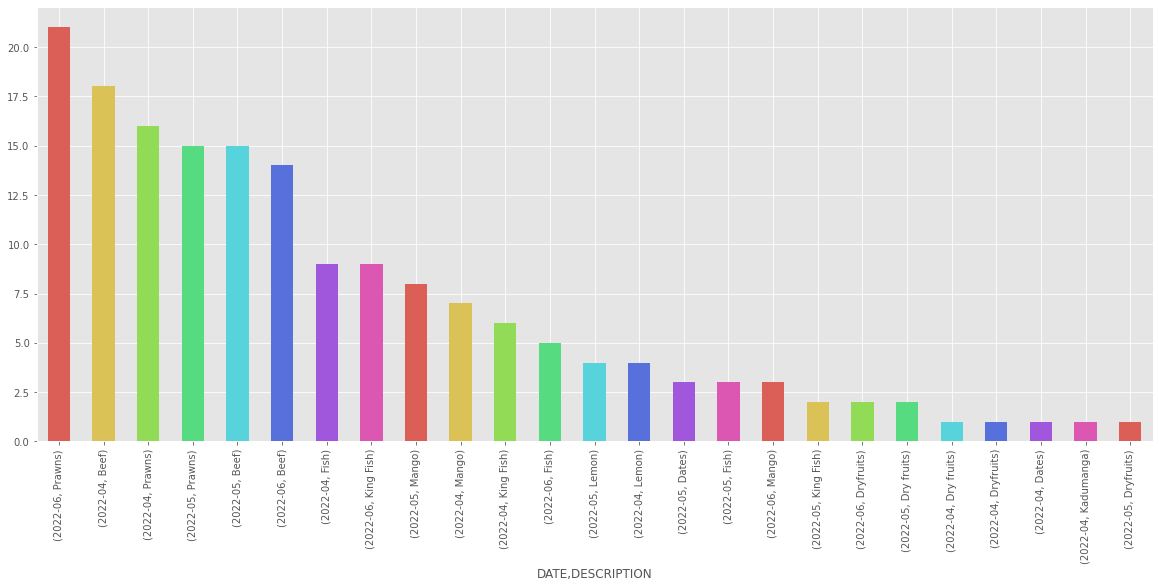

In [ ]:
plt.figure(figsize=(20,8))
df.groupby(['DATE','DESCRIPTION']).sum()['UNIT'].sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("hls", 8))
#Date and Description by sum of unit

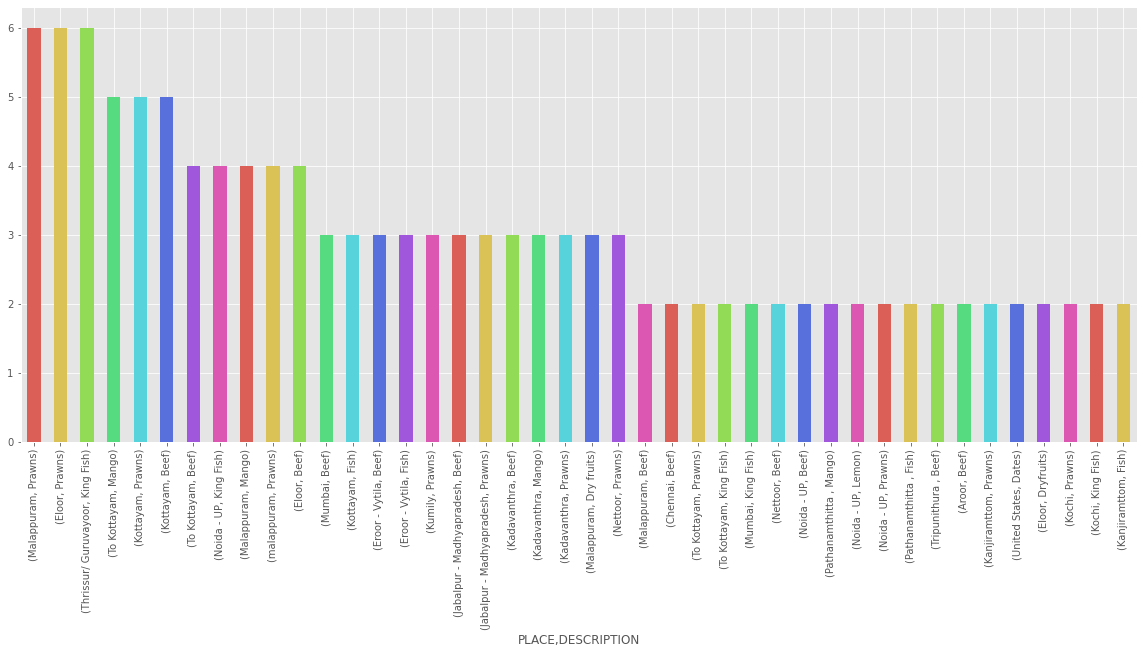

In [ ]:
plt.figure(figsize=(20,8))
df.groupby(['PLACE','DESCRIPTION']).sum()['UNIT'].sort_values(ascending=False)[:42].plot(kind='bar',color=sns.color_palette("hls", 8))
#PLACE and Description by sum of unit >1

**ALL DATA IN ONE IMAGE**

In [ ]:
fig = px.bar(df, x="PLACE", y="UNIT",color="DATE",pattern_shape="DESCRIPTION")
fig.show()
#number of unit by Place  for every month of every discription
# UNITE at y-axis,PLACE at x-axis,colors represnt date,pattern represent Description

In [ ]:
fig = px.scatter(df, y="PLACE", x="UNIT", color="DATE", symbol="DESCRIPTION")
fig.update_traces(marker_size=8)
fig.show()
#this plot is very easy for reading we can see that in unit 1 have maximum number of secription and places
# and in unit 5 and 6 have only one description

**1.read and explore data , in this dataset having 111 rows and 4 columns three columns are string categorical and one is numeric-catogorical**

**2.Cleaned data like deal with null and duplicates values and change date from yy-mm-dd to yy-mm for better visualizaion**

**3.Applied univariate analysis means visualize all 4 columns  sepreadly in bar plot and pie plot**

**4.Appliead bivariate/multivariate analysis means visualize more than one columns in one graph and in last visualize all data in one image**
#**Insights**

**1.The dataset time interval from april to july and total unit of products in april is  maximum and in july is minimum and units deacrease every month**

**2.Beef and Prawns sold in maximum unit  and Kadumanga sold only one unit**

**3.seven values of places are missing and sum of unit in thoses places is 12 and Malappuram have maximum time markiting**

**4.in Unite columns represnt the sold product in unit maximum unit of any sold product is 6 and minimum is 1**

**5.Malappuram sold maximum products , discription of those products are (Dry fruits,Lemmon,Mango,Prwans,Fish beef) and Prwans sold more unite compare to all others and in mangalore sold only one product and one unit**

**6.Mangoes have maximum avg unit in one month and every month decrease this avg** 

**7.Maximum avg units in Guruvayoor and Eloors  Description of this unit is Fish and Prawns**


# **Note:**
**with reading these graph anyone can get inshiths easily bcz dataset is not complex and its images easy to read**